In [3]:
import os, sys
from glob import glob
from utils import p2r, stack_features, word2sense, regression, cv_regression_w2s, image_to_tensor, Subject, listdir
import numpy as np
from tqdm import tqdm

import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from collections import OrderedDict 

In [1]:
# Setup w2s
w2s_file = "ThingsWrd2Sns.txt"
_, w2s_embeddings = word2sense(w2s_file)
nDim = 2250

# Cat's new word2vec (312 categories)
embedding_file = "ThingsWrd2Vec_subset.txt"
f = open(embedding_file, 'r', encoding='utf-8')
wordvec2lines = f.readlines()
f.close()

wordvec2 = {}

# Wordvec filtered by CM
for i, wv2 in enumerate(wordvec2lines):
    if i == 0:
        continue
    word = (wordvec2lines[i].split(','))[0]
    if word in w2s_embeddings:
        wordvec2[word] = wordvec2lines[i].split(',')[1:]
        wordvec2[word][-1] = wordvec2[word][-1].replace('\n', '')

for wv in wordvec2:
    wordvec2[wv] = np.array(wordvec2[wv]).astype(np.float)

nPC = 7;

NameError: name 'word2sense' is not defined

In [4]:
# Setup w2s
w2s_file = "ThingsWrd2Sns.txt"
_, w2s_embeddings = word2sense(w2s_file)
nDim = 2250

# Setup wordvec, sensevec
embedding_file = "sensevec_augmented_with_wordvec.csv"
f = open(embedding_file, 'r', encoding='utf-8')
senseveclines = f.readlines()
f.close()

embedding_file = "wordvec.csv"
f = open(embedding_file, 'r', encoding='utf-8')
wordveclines = f.readlines()
f.close()

# Cat's new word2vec (312 categories)
embedding_file = "ThingsWrd2Vec_subset.txt"
f = open(embedding_file, 'r', encoding='utf-8')
wordvec2lines = f.readlines()
f.close()

wordvec = {}
sensevec = {}
wordvec2 = {}

things = sorted(os.listdir('predicted_EVC_conv5'))

for i, thing in enumerate(things):
    if thing in w2s_embeddings:
        wordvec[thing] = wordveclines[i].split(',')
        wordvec[thing][-1] = wordvec[thing][-1].replace('\n', '')
        sensevec[thing] = senseveclines[i].split(',')
        sensevec[thing][-1] = sensevec[thing][-1].replace('\n', '')

# Wordvec without nan
wordvec_nonan = wordvec
nankeys = []
for wv in wordvec:
    ar = np.array(wordvec[wv])
    ar = ar.astype(np.float)
    if np.isnan(ar).any():
        nankeys.append(wv)

print(len(nankeys))  
 
for n in nankeys:
    del wordvec_nonan[n]

for wv in wordvec_nonan:
    wordvec_nonan[wv] = np.array(wordvec_nonan[wv]).astype(np.float)
    
print(len(wordvec_nonan.keys()))

# Wordvec filtered by CM
for i, wv2 in enumerate(wordvec2lines):
    if i == 0:
        continue
    word = (wordvec2lines[i].split(','))[0]
    if word in w2s_embeddings:
        wordvec2[word] = wordvec2lines[i].split(',')[1:]
        wordvec2[word][-1] = wordvec2[word][-1].replace('\n', '')

for wv in wordvec2:
    wordvec2[wv] = np.array(wordvec2[wv]).astype(np.float)
    

# Sensevec
for i, thing in enumerate(things):
    if thing in w2s_embeddings:
        sensevec[thing] = senseveclines[i].split(',')
        sensevec[thing][-1] = sensevec[thing][-1].replace('\n', '')
            
sensevec_nonan = sensevec
nankeys = []
for sv in sensevec:
    ar = np.array(sensevec[sv])
    ar = ar.astype(np.float)
    if np.isnan(ar).any():
        nankeys.append(sv)

print(nankeys)  
 
for n in nankeys:
    del sensevec_nonan[n]

for sv in sensevec_nonan:
    sensevec_nonan[sv] = np.array(sensevec_nonan[sv]).astype(np.float)
    
print(len(sensevec_nonan.keys()))

# Sensevec filtered to 312 categories
sensevec_filtered = {}

for i, wv2 in enumerate(wordvec2lines):
    if i == 0:
        continue
    word =  (wordvec2lines[i].split(','))[0]
    if word in sensevec.keys():
        sensevec_filtered[word] = sensevec[word]

# Wordvec (osf) filtered to 312 categories
wordvec_filtered = {}

for i, wv2 in enumerate(wordvec2lines):
    if i == 0:
        continue
    word =  (wordvec2lines[i].split(','))[0]
    if word in wordvec.keys():
        wordvec_filtered[word] = wordvec[word]
    
# dimensionality score
r_threshold = p2r(0.05/nDim, 1470)
r_threshold_wordvec = p2r(0.05/300, len(wordvec2lines)-1)

nPC = 7;

110
1360
['handcuff', 'paperweight', 'peppermint', 'pug', 'slime', 'teacup']
1464


In [5]:
# Best predicted dimensions
from train import mean_condition_features
from feature_extractors import AlexNetConv1, AlexNetConv5, AlexNetFC6

condition_features_cnn = stack_features('features_conv5.pth', fmri=False)

rois = ['LOC'] 
layers = ['conv5'] #'conv1', 'conv5', 'fc6', 'conv1_r', 'conv5_r', 'fc6_r'
subjects = ['subj001/', 'subj002/', 'subj003/', 'subj004/'] #subj001/ , 'subj002/', 'subj003/', 'subj004/'

for layer in layers:
    for roi in rois:
        for sub in subjects:

            fmri_path = "predictedww/" + sub + roi + "_" + layer
            fmri_path = os.path.join(os.getcwd(), fmri_path) 

            if sub == 'subj001/':
                condition_features = stack_features(fmri_path, fmri=True)
            else:
                temp = stack_features(fmri_path, fmri=True)
                condition_features = np.hstack((condition_features, temp))

# rois = ['LOC']
# subjects = ['subj001/', 'subj002/', 'subj003/', 'subj004/'] #subj001/ , 'subj002/', 'subj003/', 'subj004/'

# for roi in rois:
#     for s in range(1, 5):
#         dict_o2v = {}
#         dict_object2vec = {}
#         subject = Subject(s, [roi])
#         dict_o2v = subject.condition_voxels
        
#         for i, thing in enumerate(o2v_embedding):
#             if thing in dict_o2v:
#                 dict_object2vec[thing] = dict_o2v[thing]
        
#         print(len(dict_object2vec))
        
#         if s == 1:
#             condition_features = np.stack([subject.condition_voxels[c] for c in dict_object2vec])
#         else:
#             temp = np.stack([subject.condition_voxels[c] for c in dict_object2vec])
#             condition_features = np.hstack((condition_features, temp))


from sklearn.cross_decomposition import CCA

cca = CCA(n_components=5)
cca.fit(condition_features_cnn, condition_features)
condition_features_cnn, condition_features = cca.transform(condition_features_cnn, condition_features)

In [6]:
print(condition_features.shape)
print(condition_features_cnn.shape)

(1470, 5)
(1470, 5)


In [7]:


from sklearn.decomposition import PCA
# nPC = 10
# pca = PCA(n_components=nPC)
# pca.fit(condition_features)   
#condition_features = pca.transform(condition_features)

weights, feature_mean_r = cv_regression_w2s(condition_features, w2s_embeddings, fit=None, k=9, l2=0.0, pc=None)



In [9]:
#feature_mean_r = feature_mean_r[np.argwhere(~np.isnan(feature_mean_r))].T[0]
maxdim = feature_mean_r.argsort()[-20:][::-1]

#print(feature_mean_r[maxdim])

print(weights.shape)
print(condition_features.shape)
predicted = np.matmul(condition_features, weights.T)
print(predicted.shape)

(2250, 5)
(1470, 5)
(1470, 2250)


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


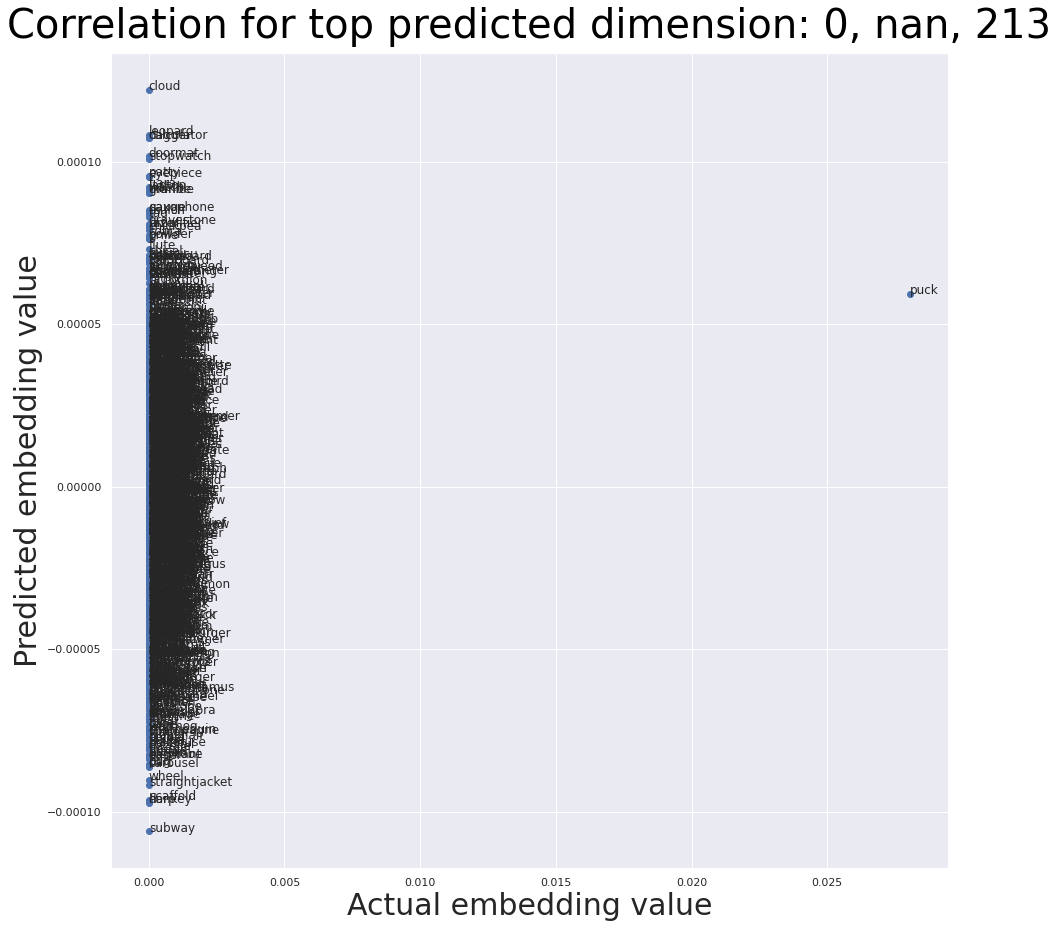

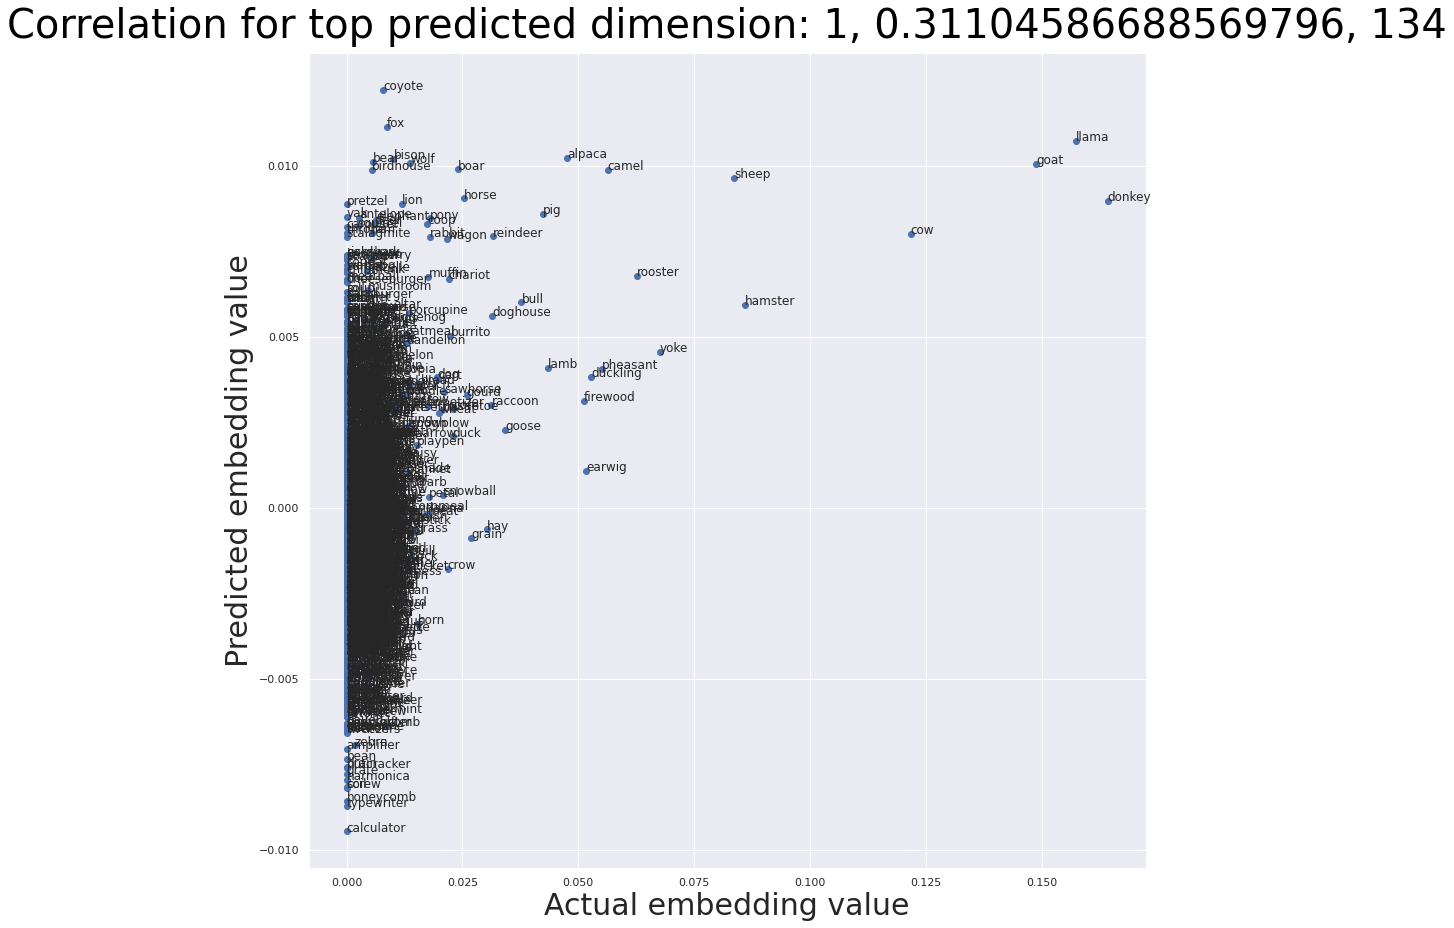

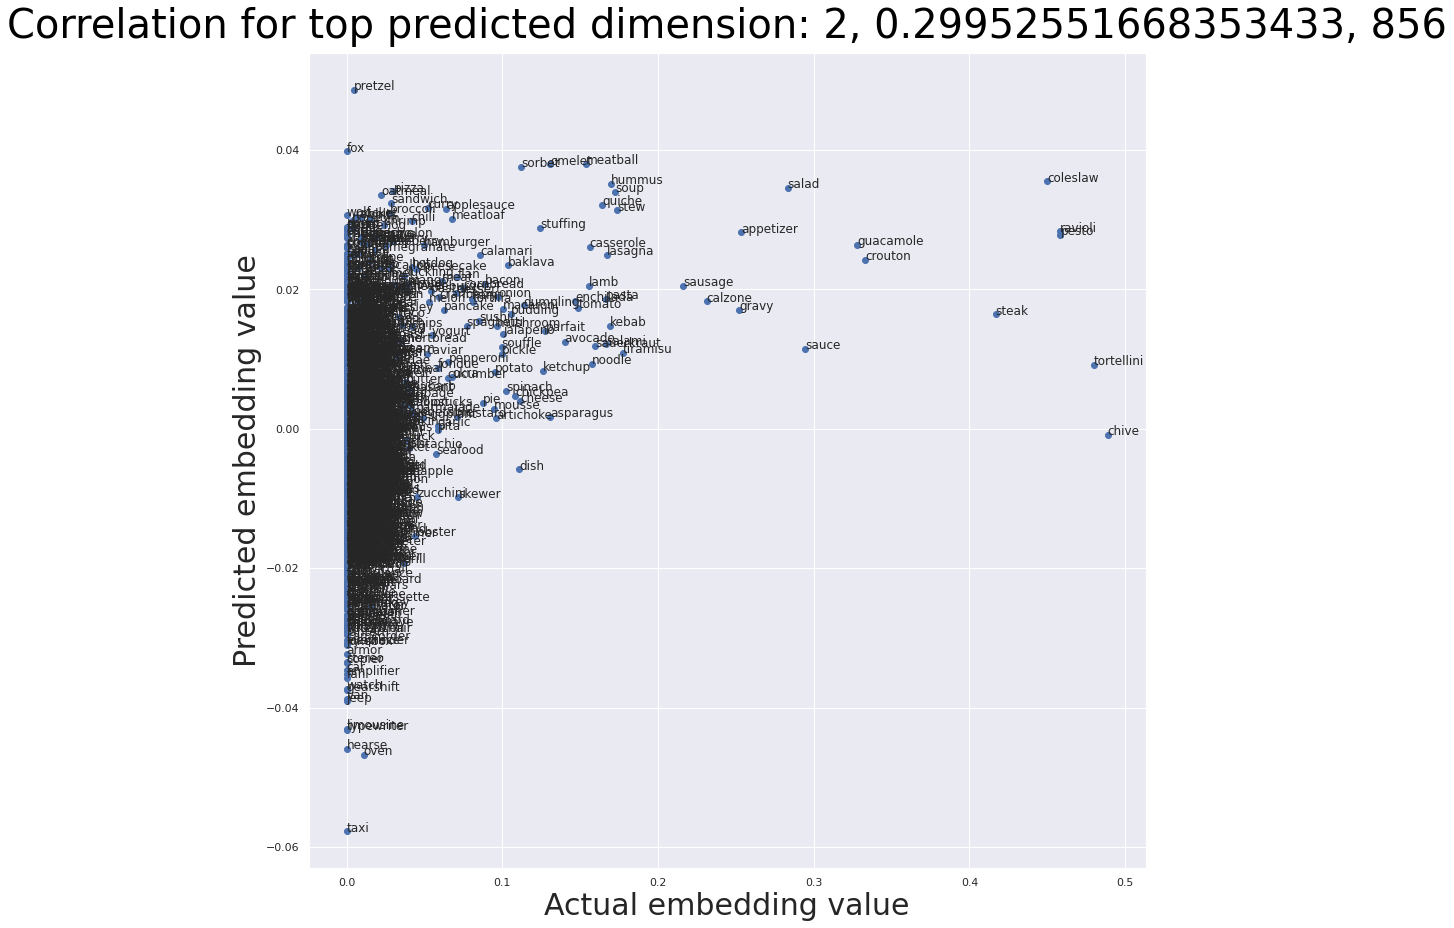

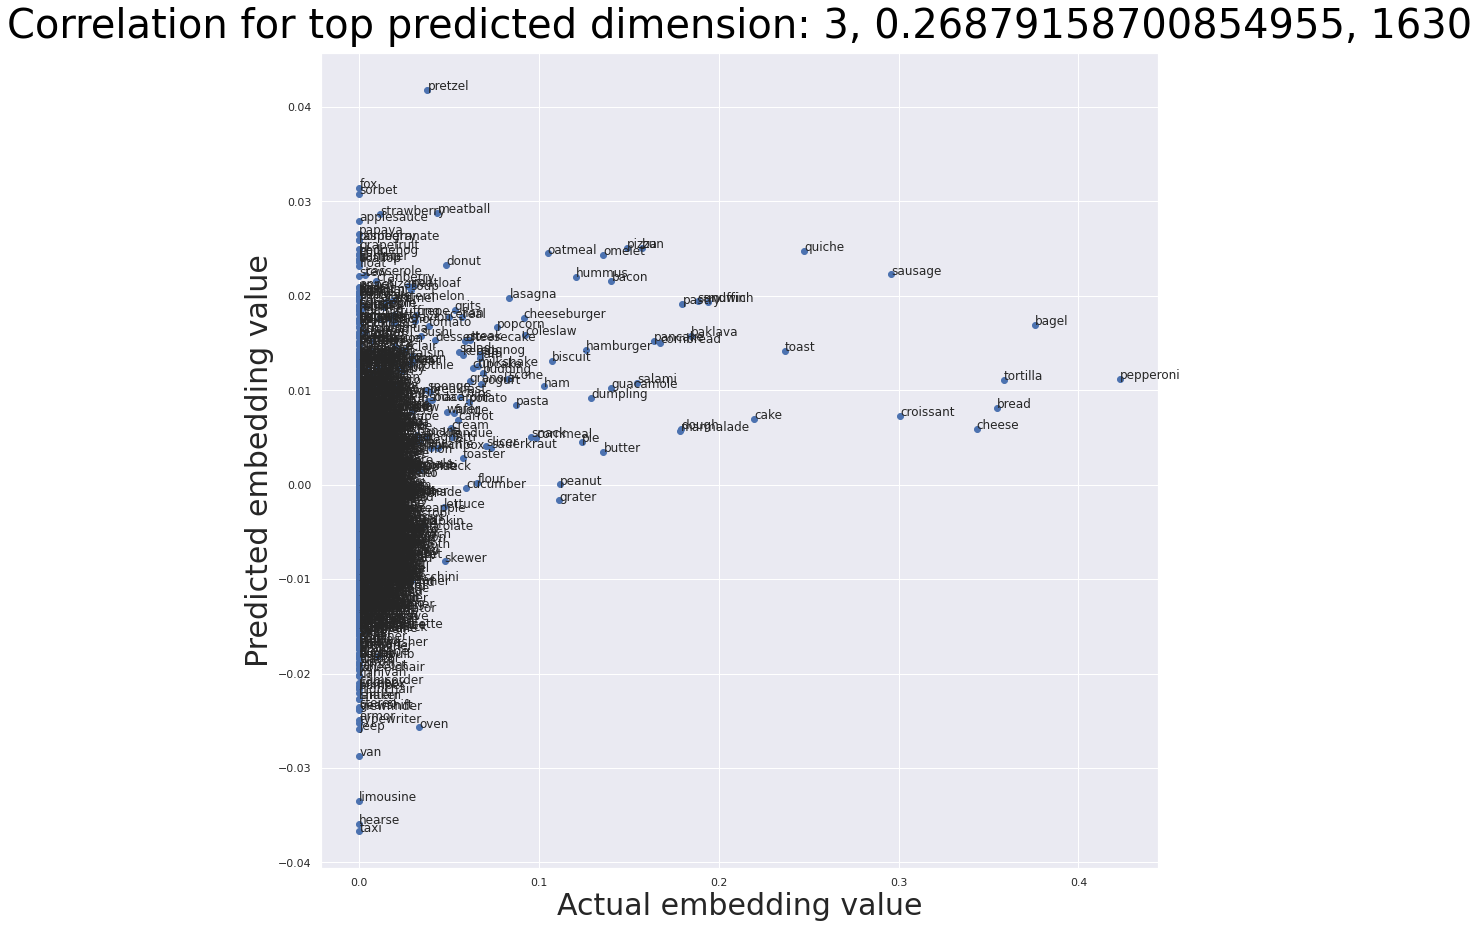

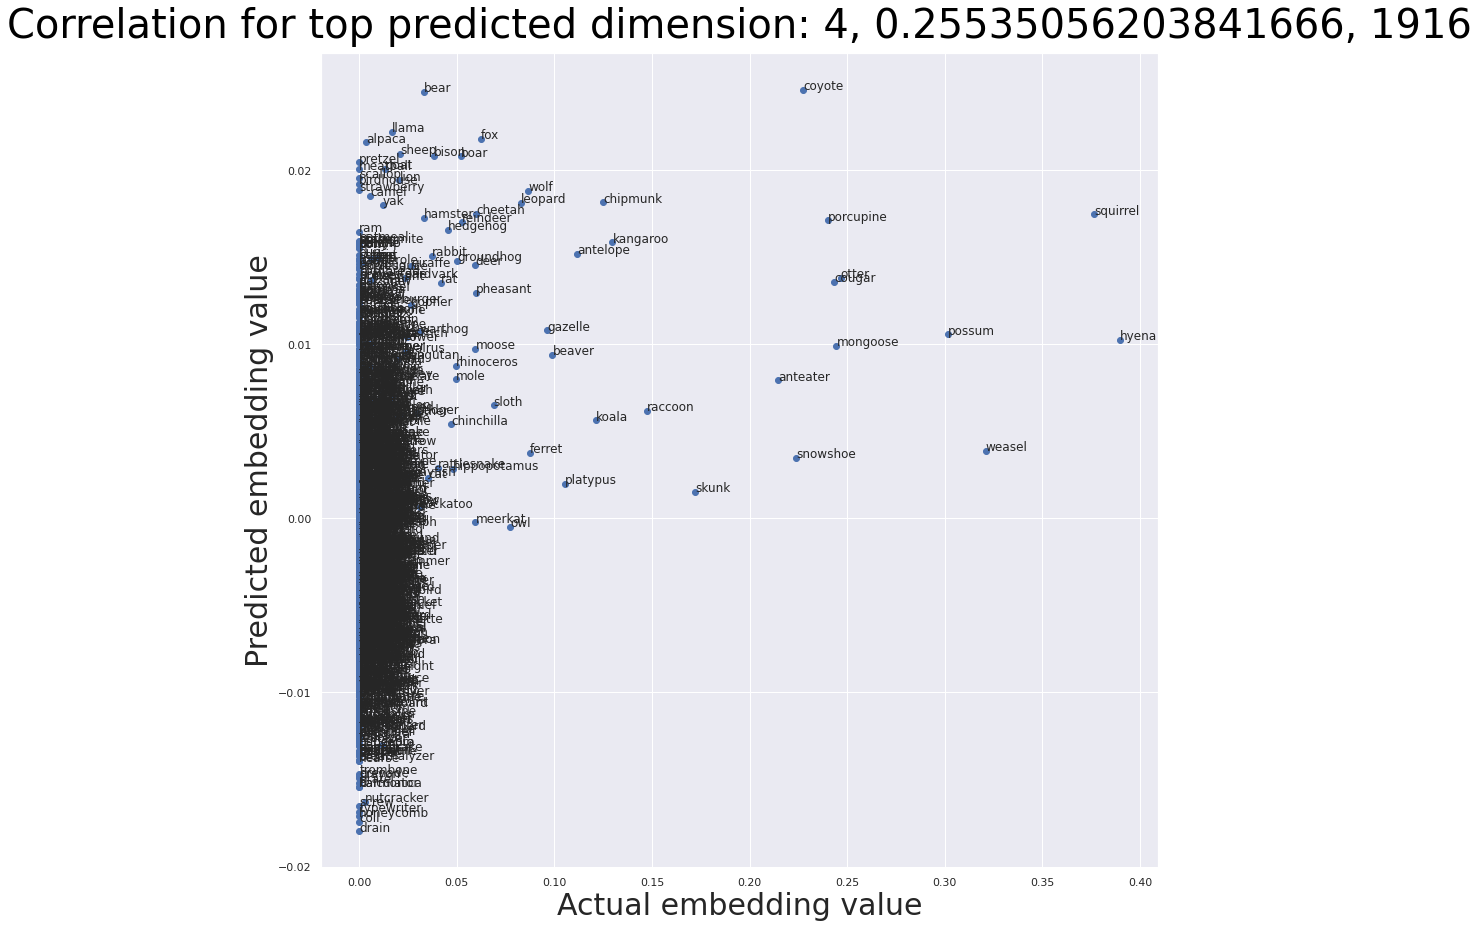

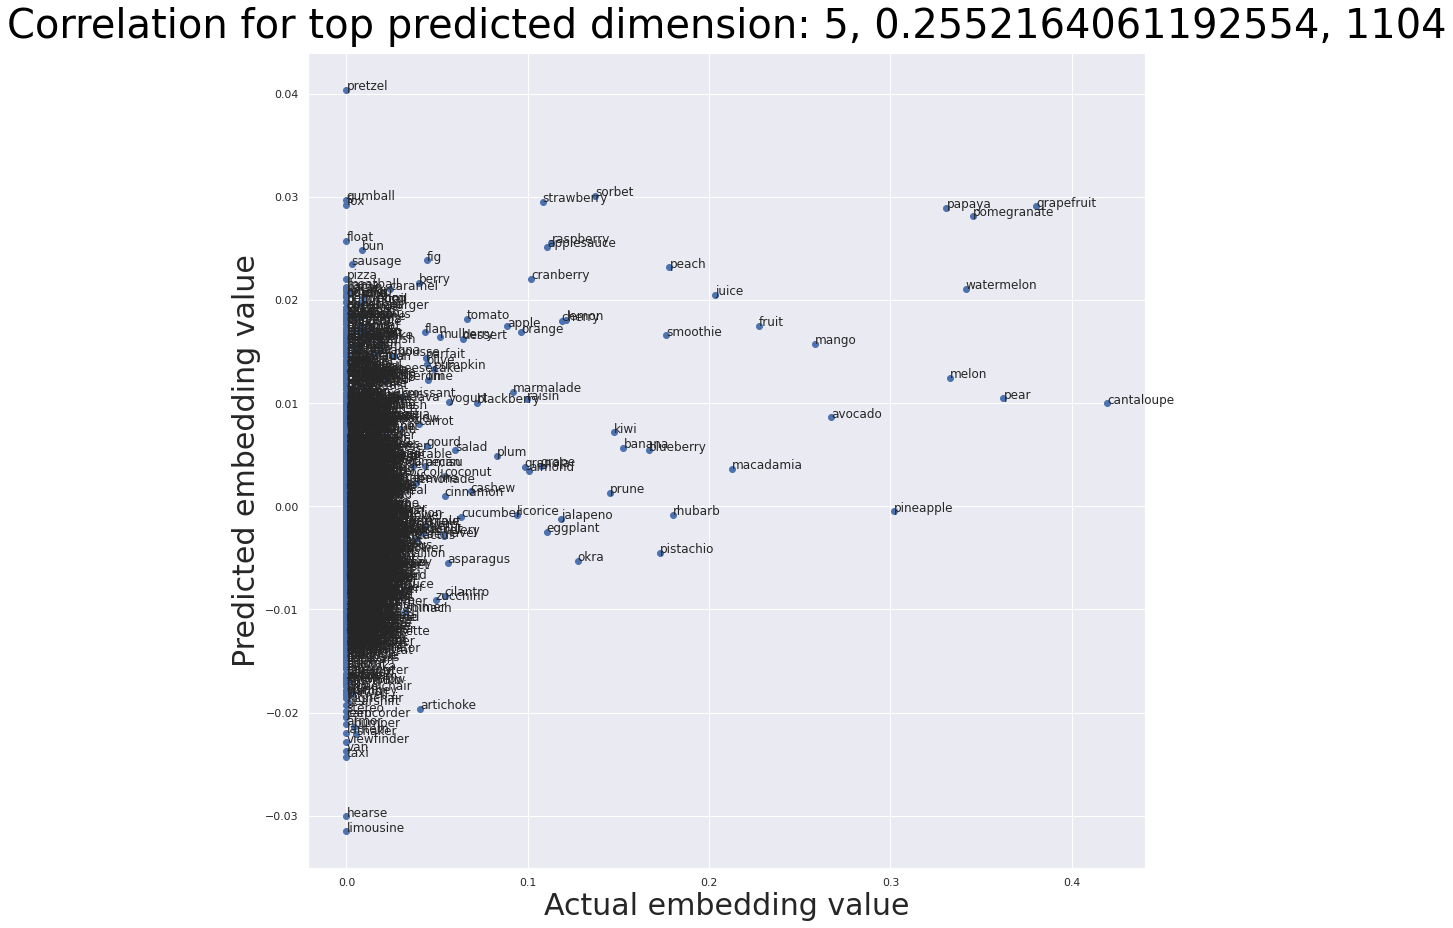

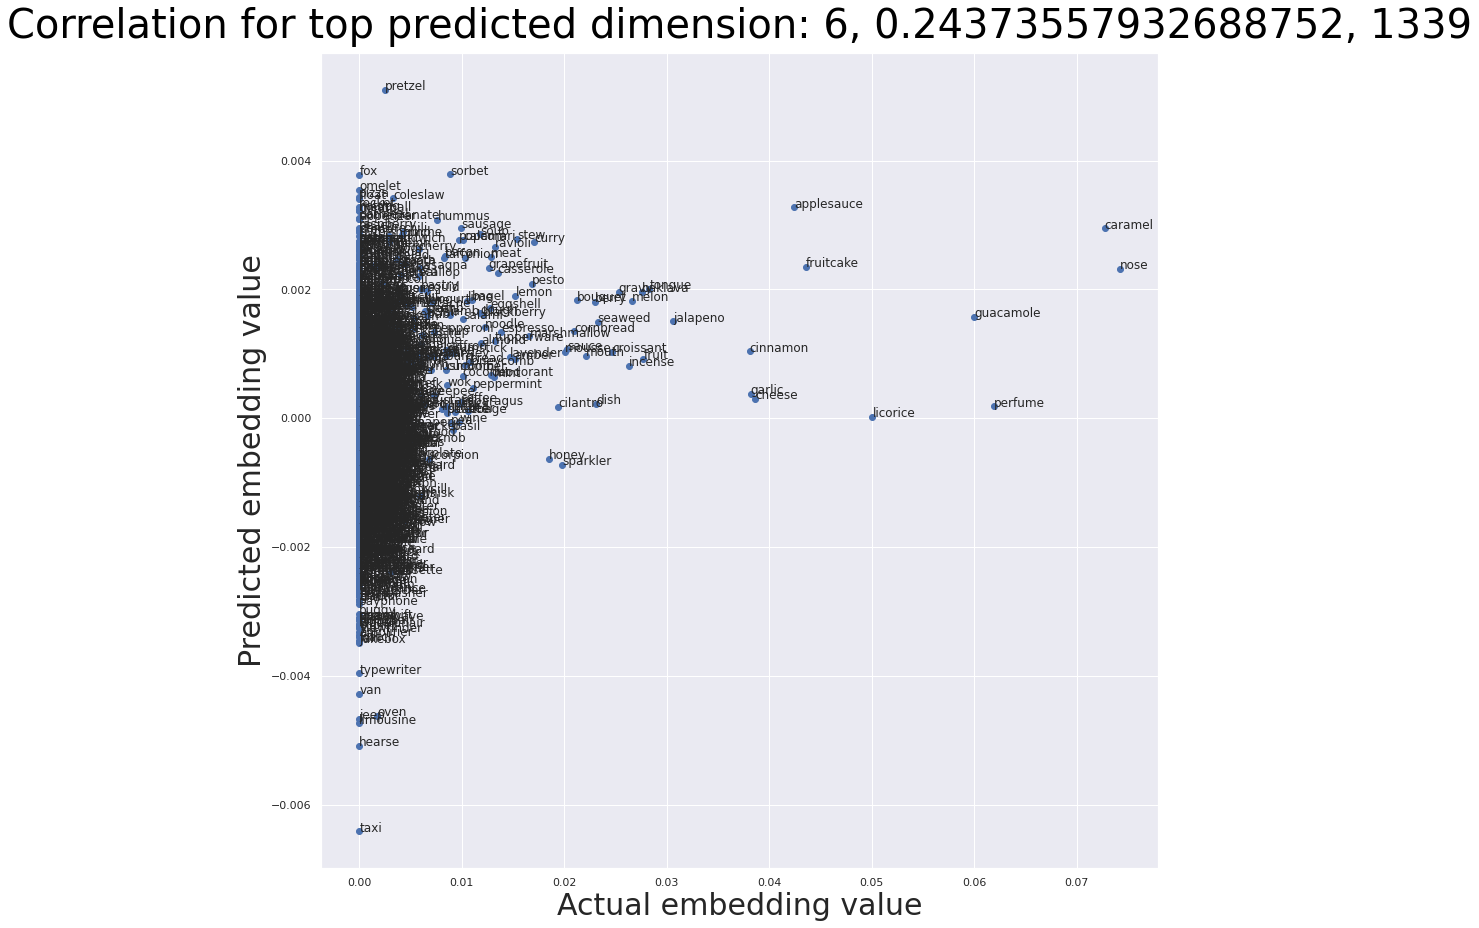

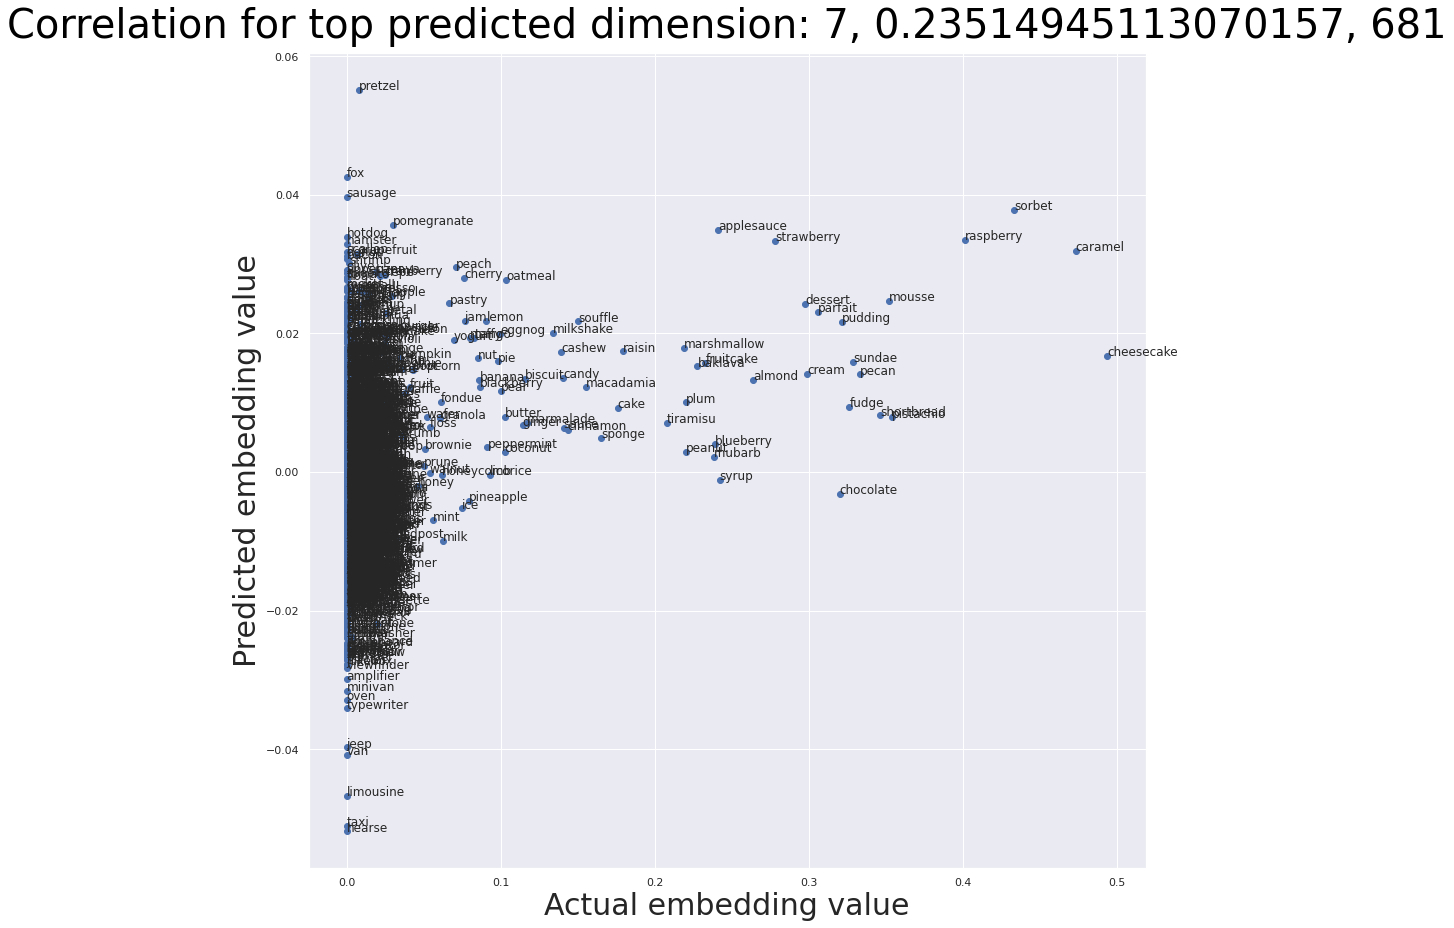

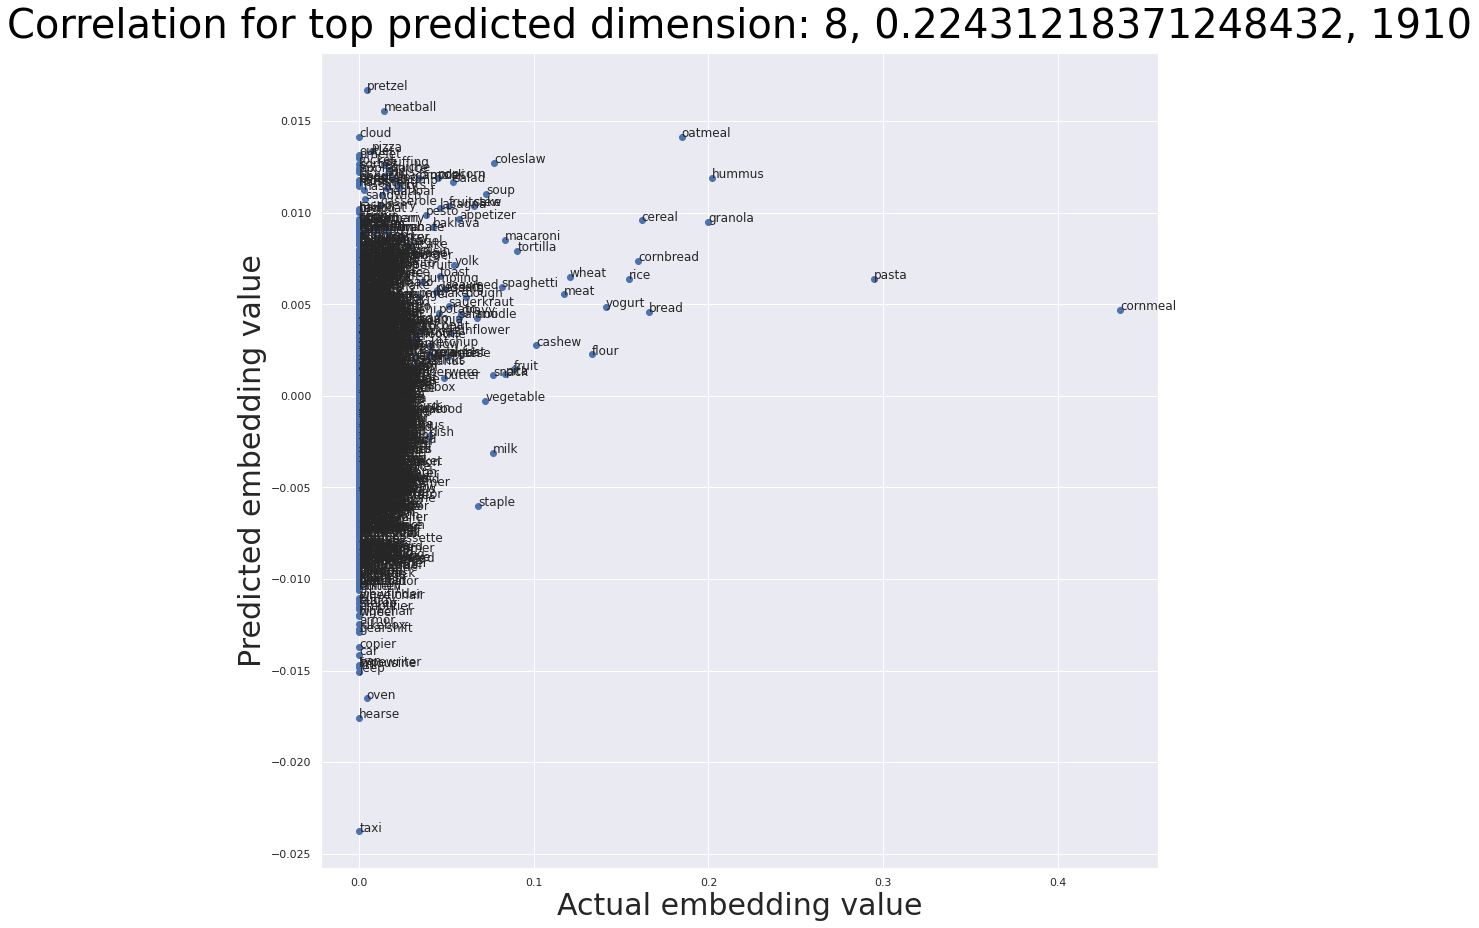

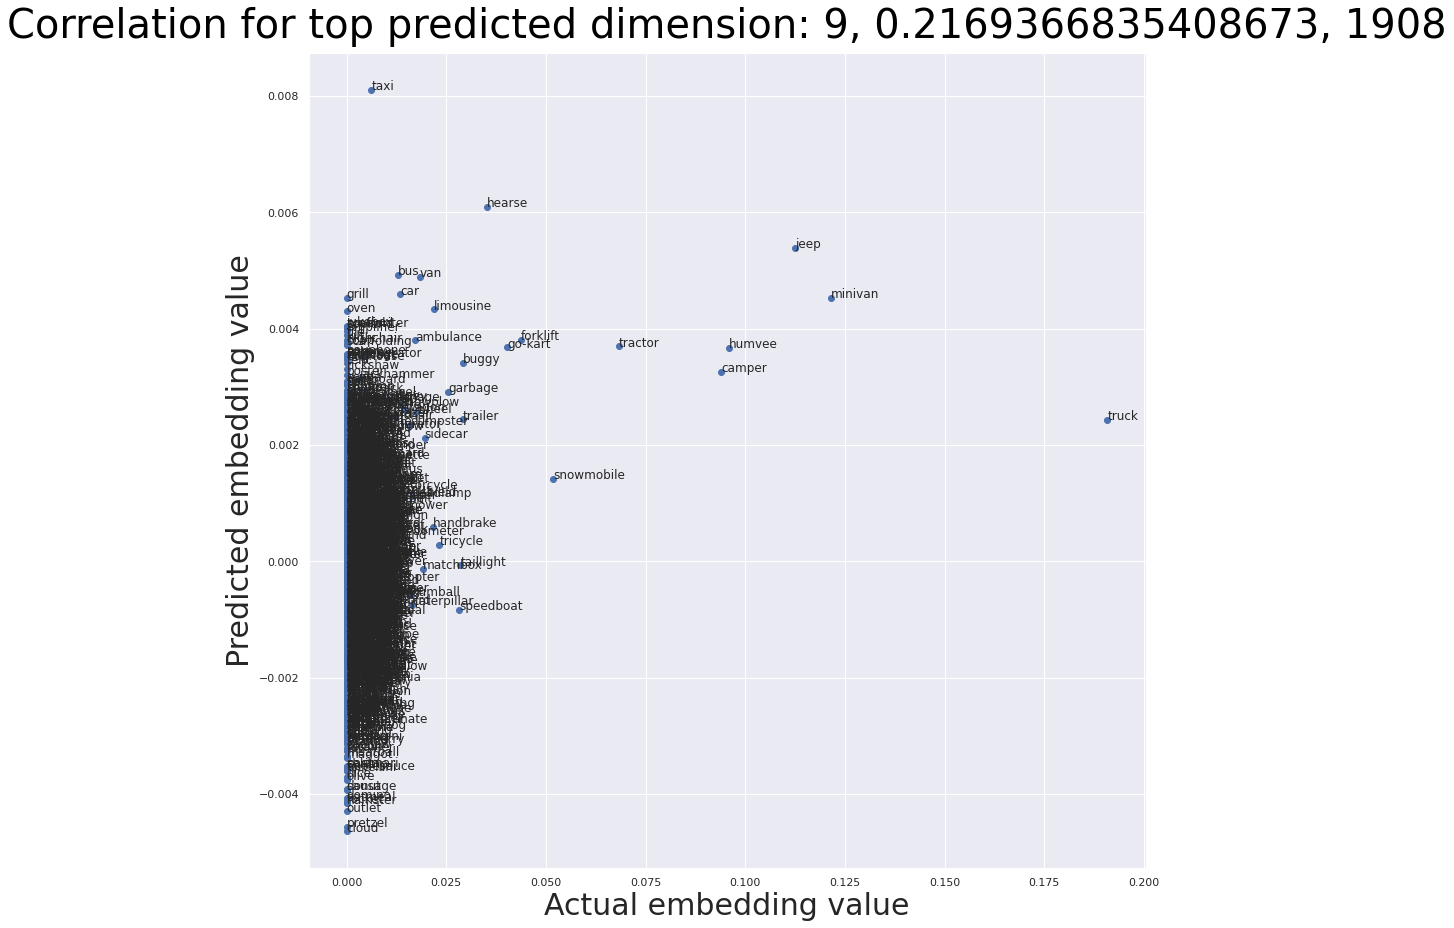

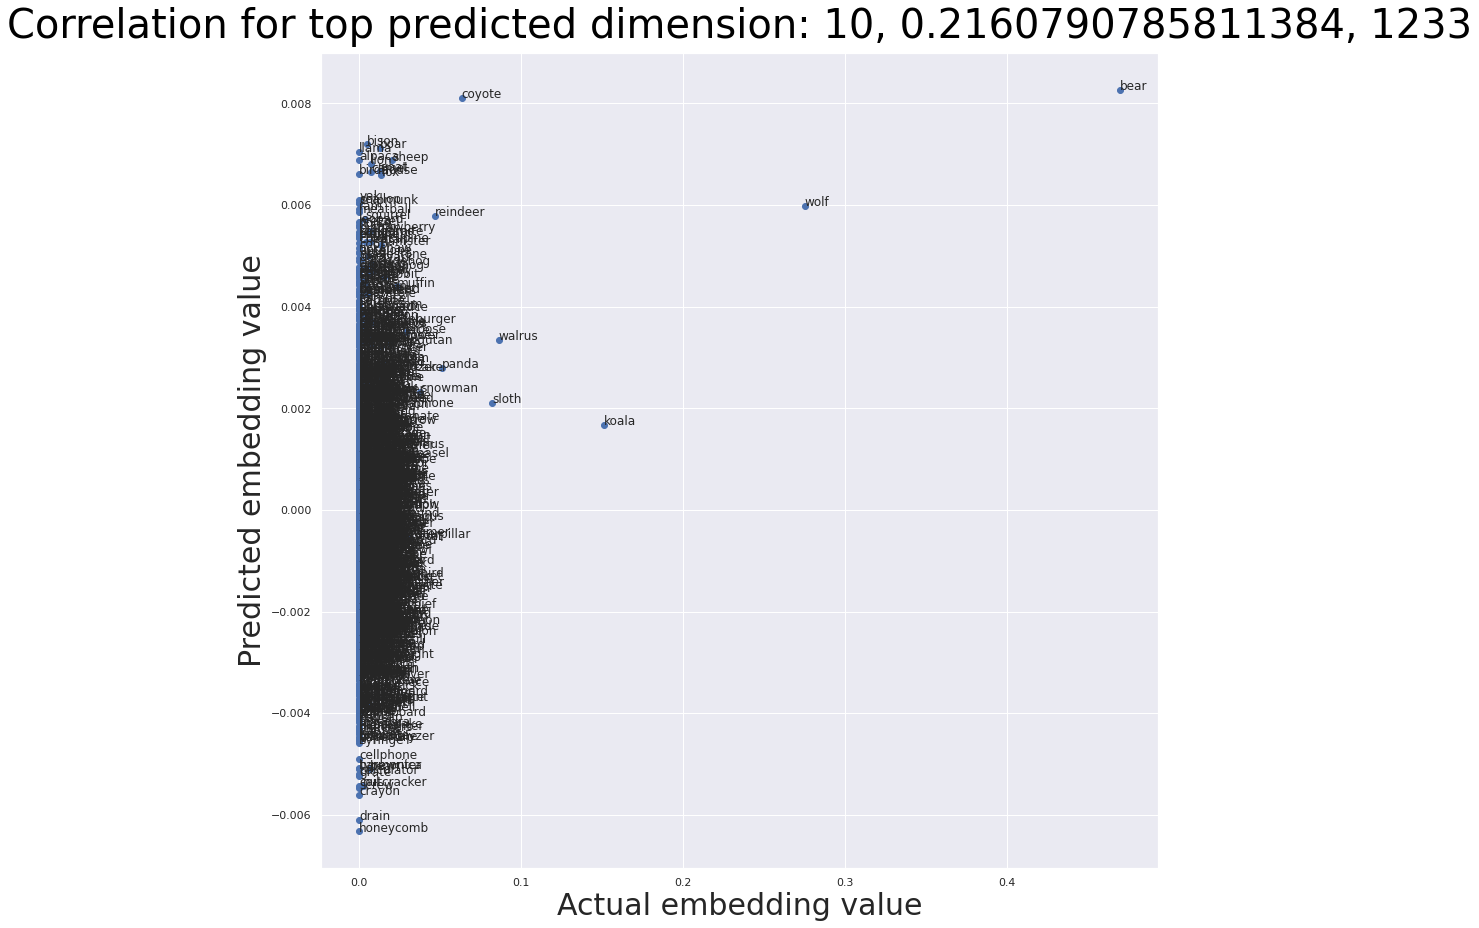

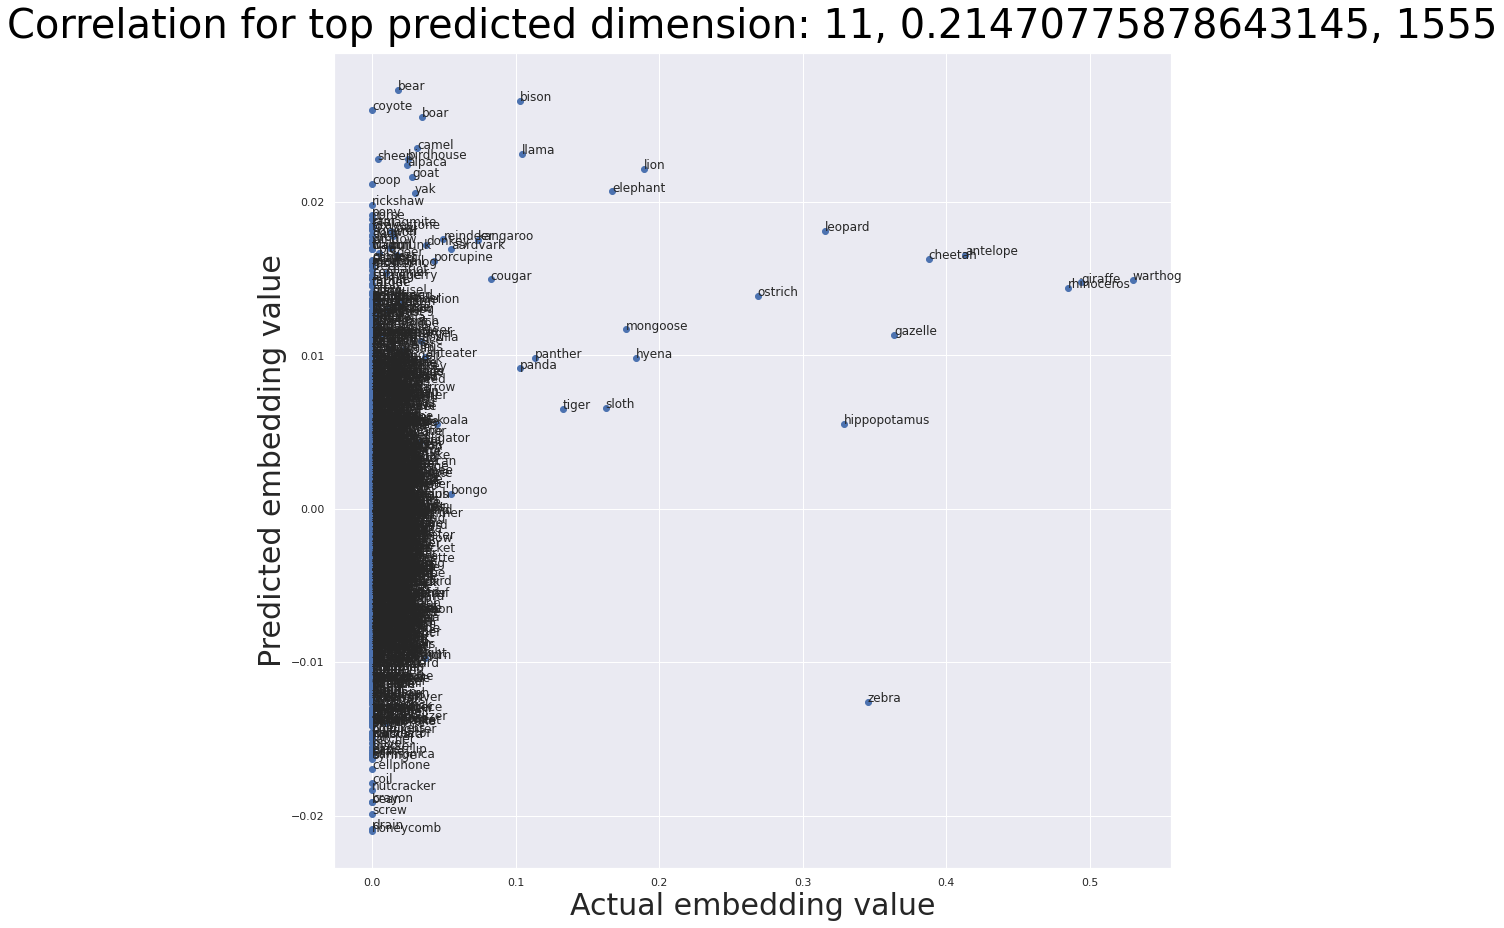

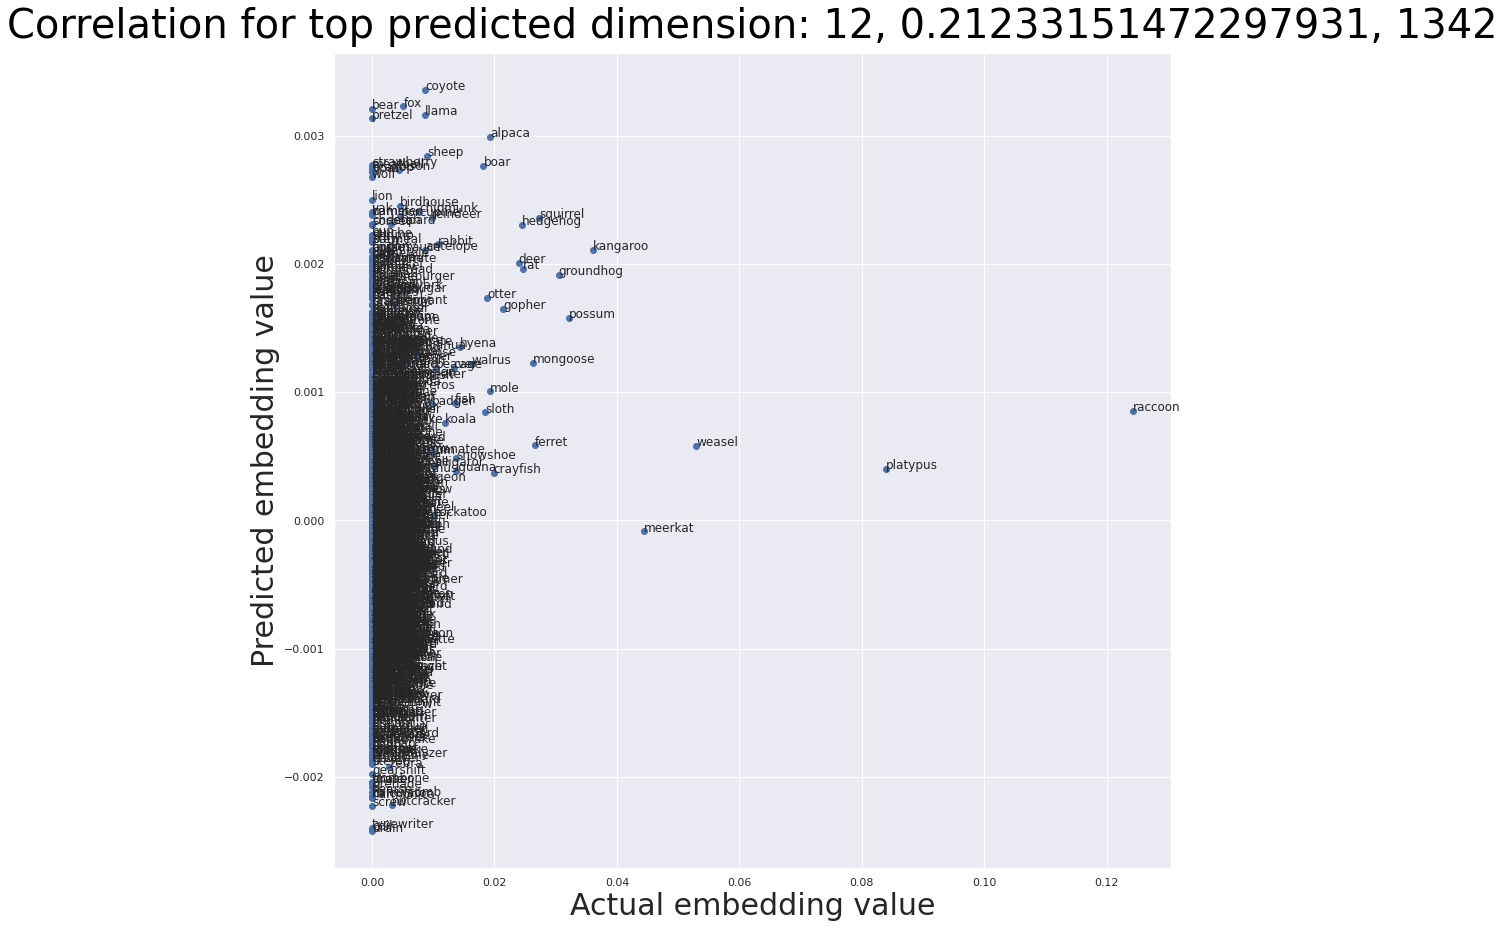

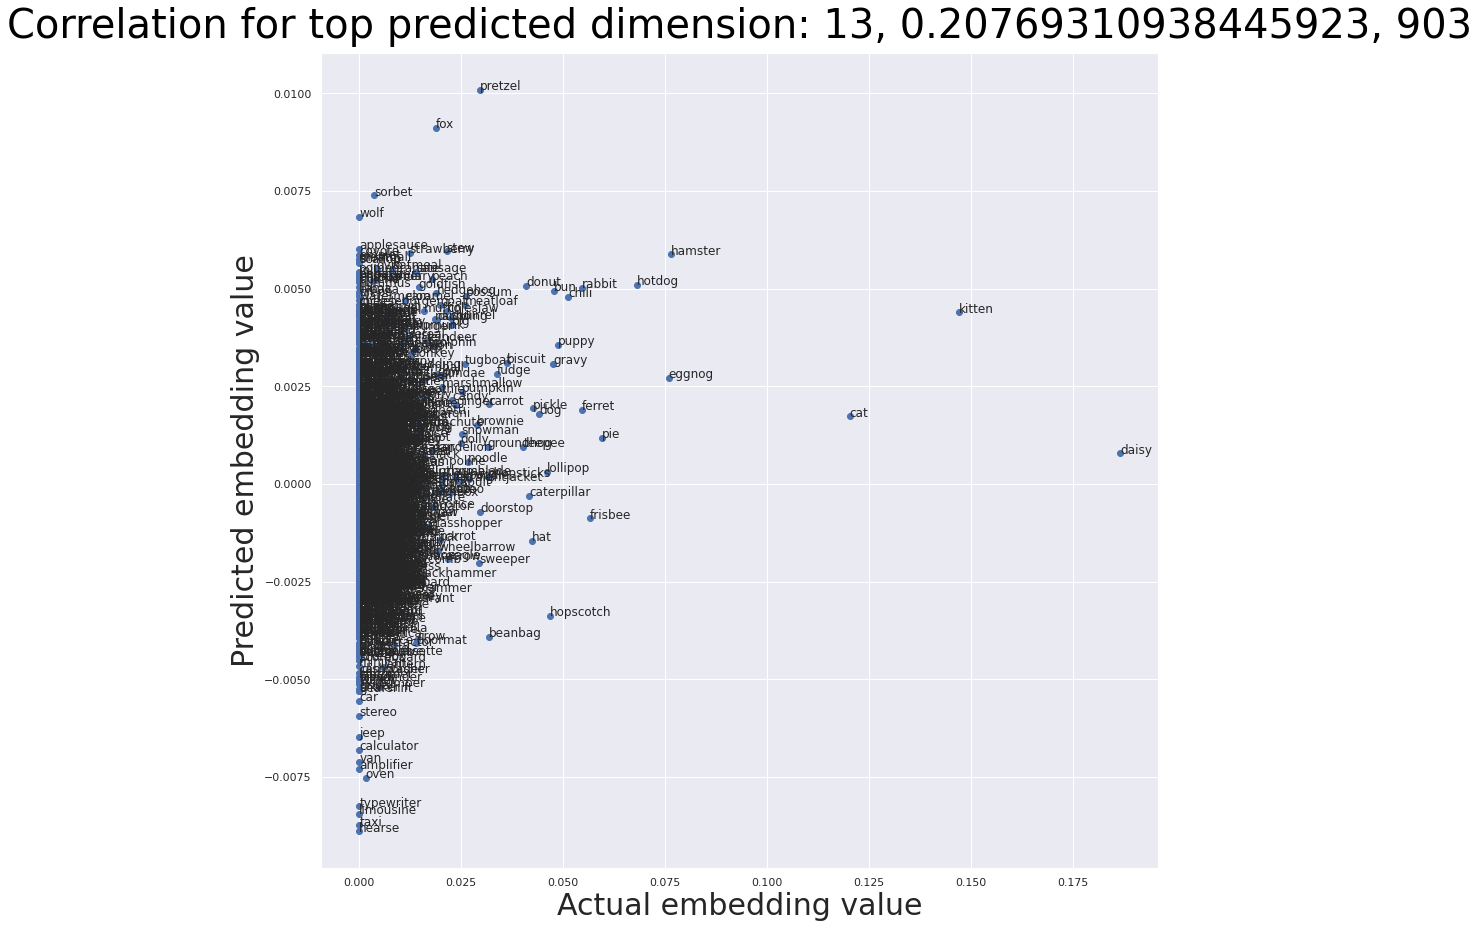

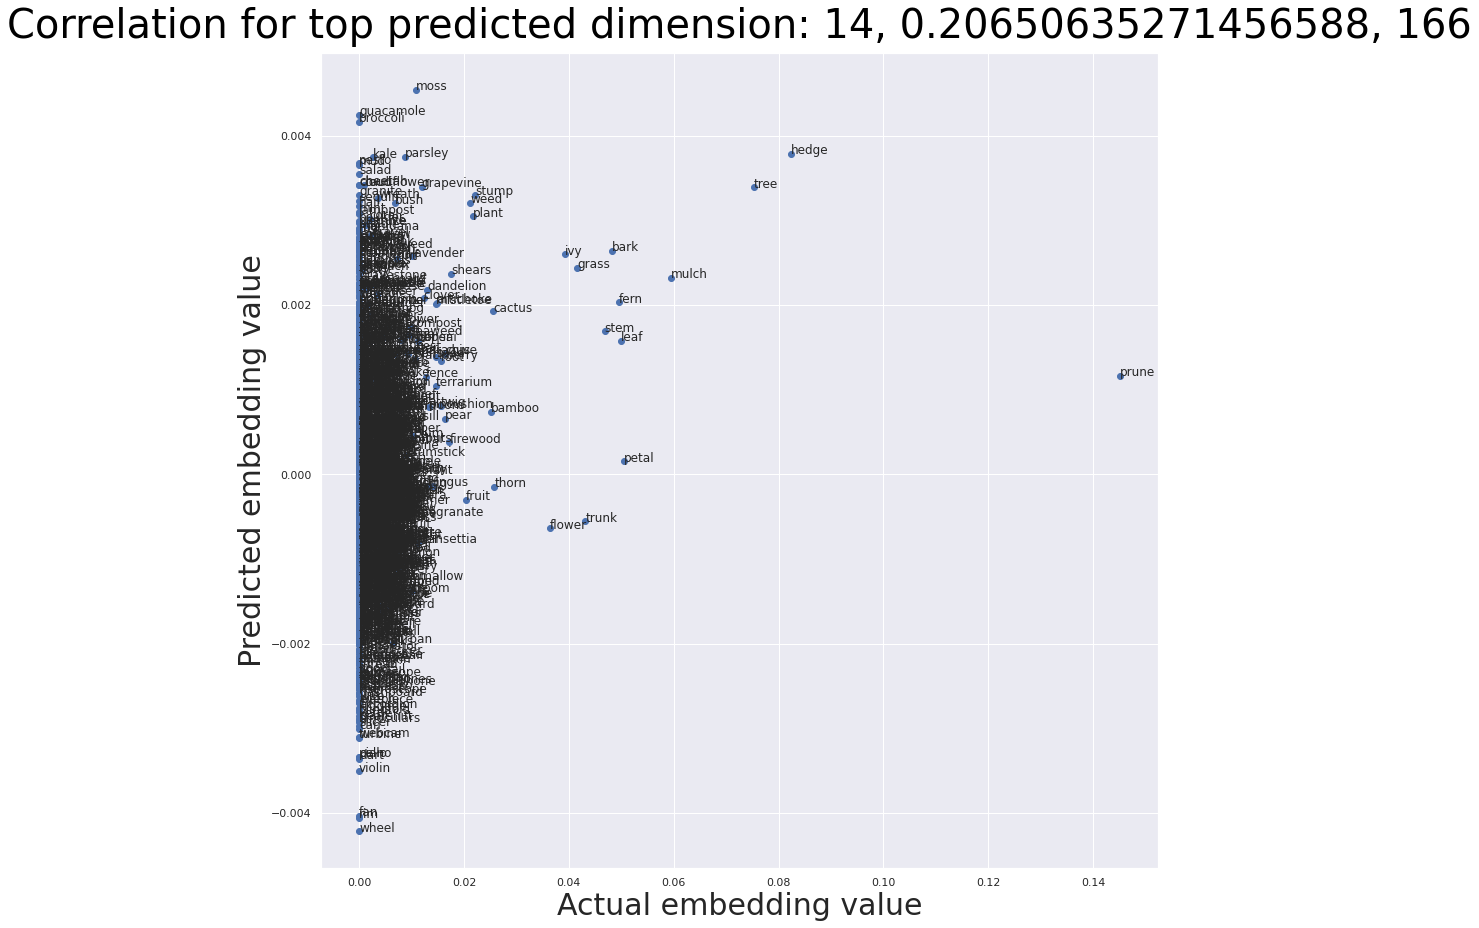

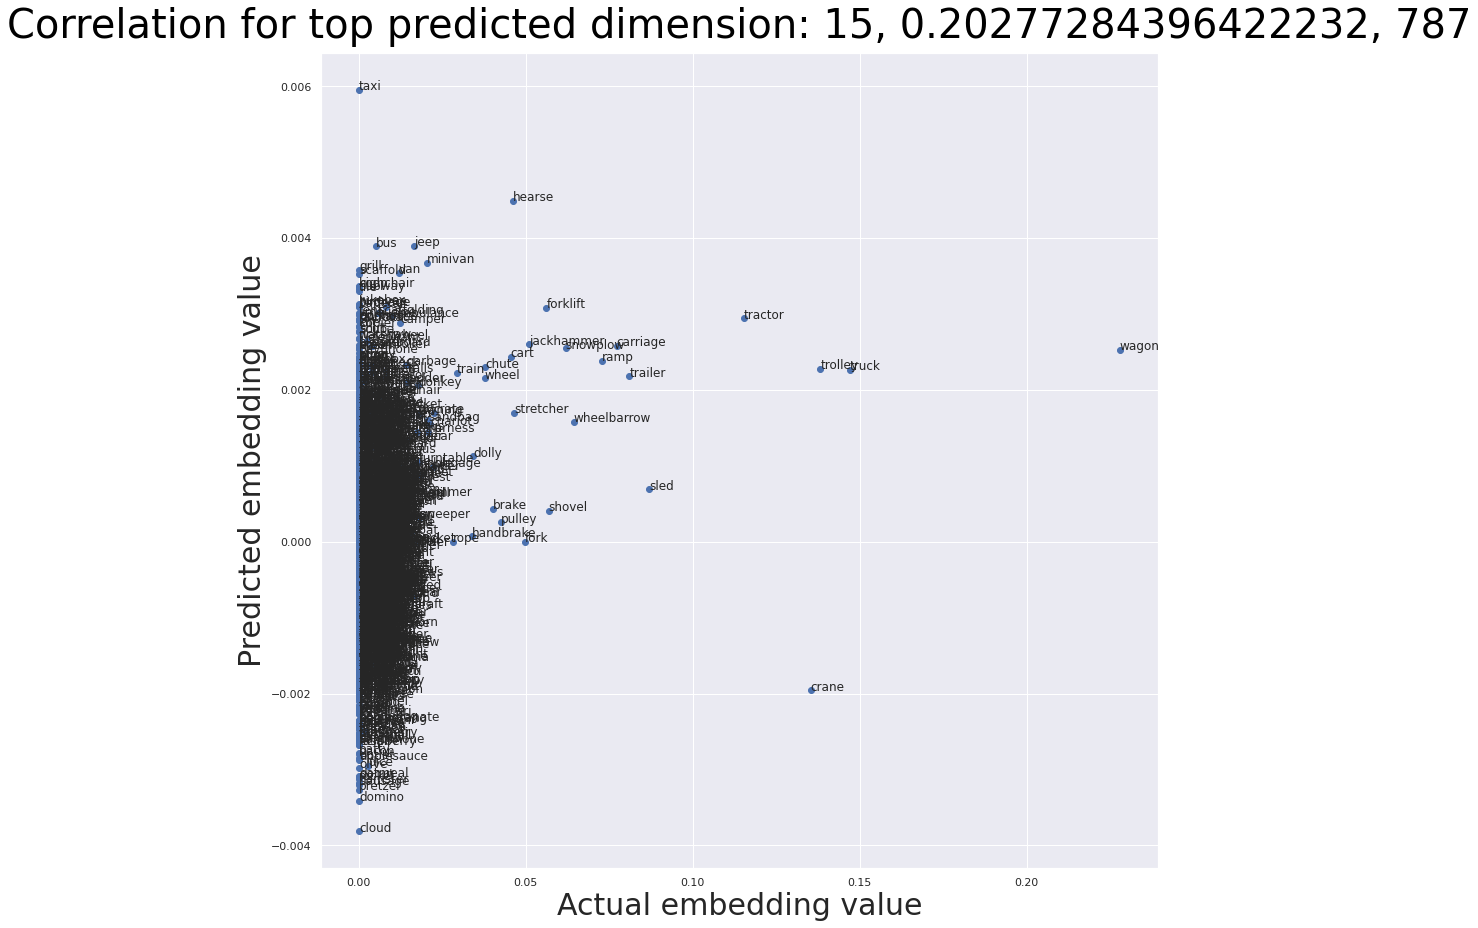

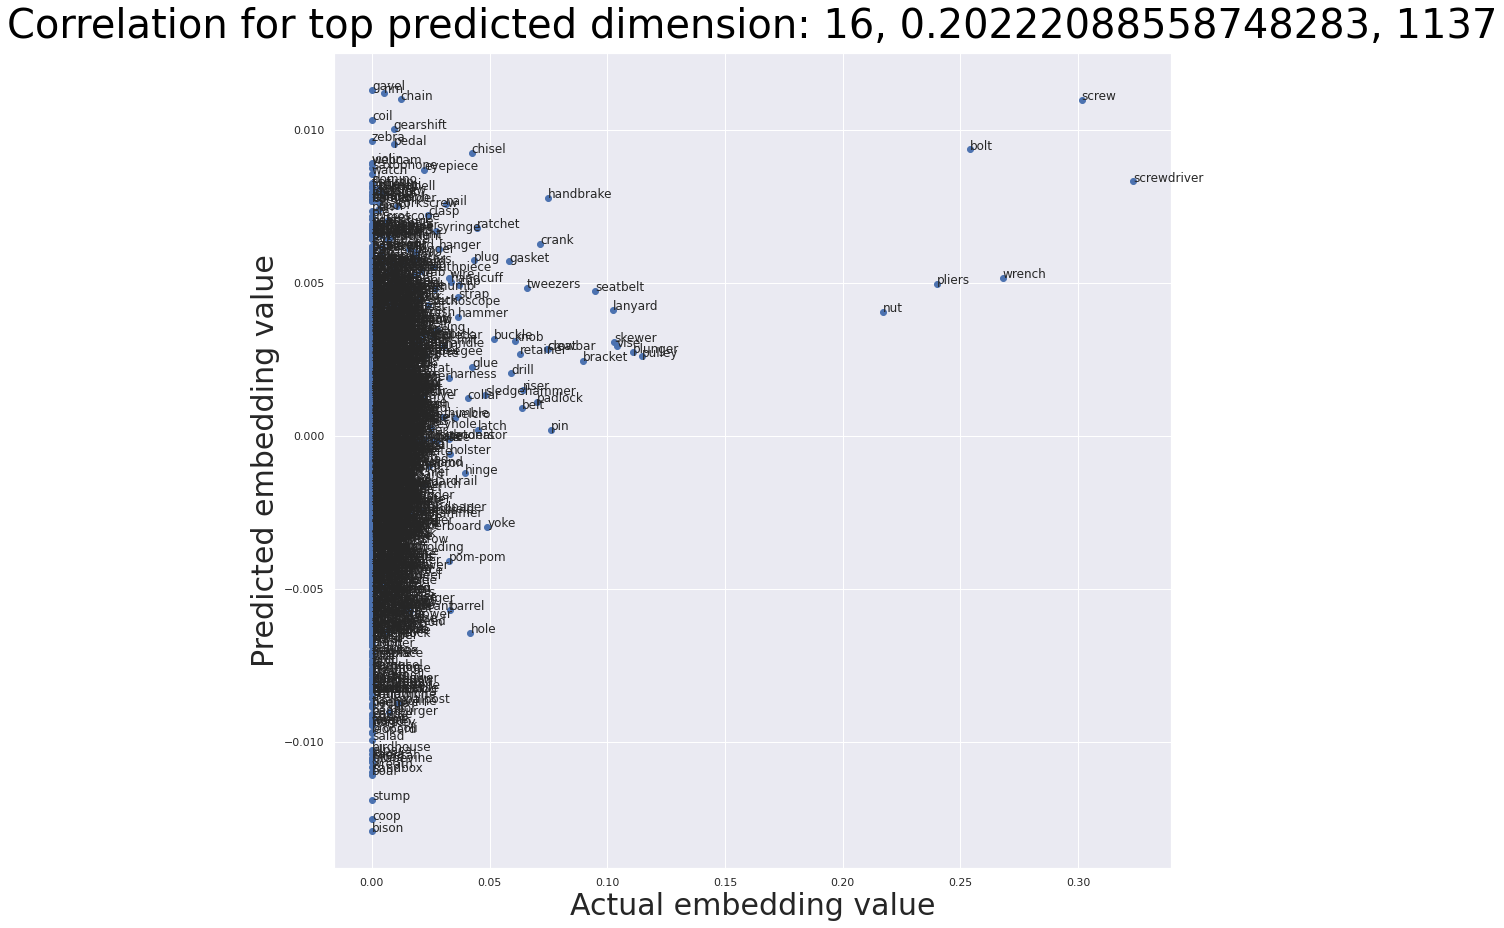

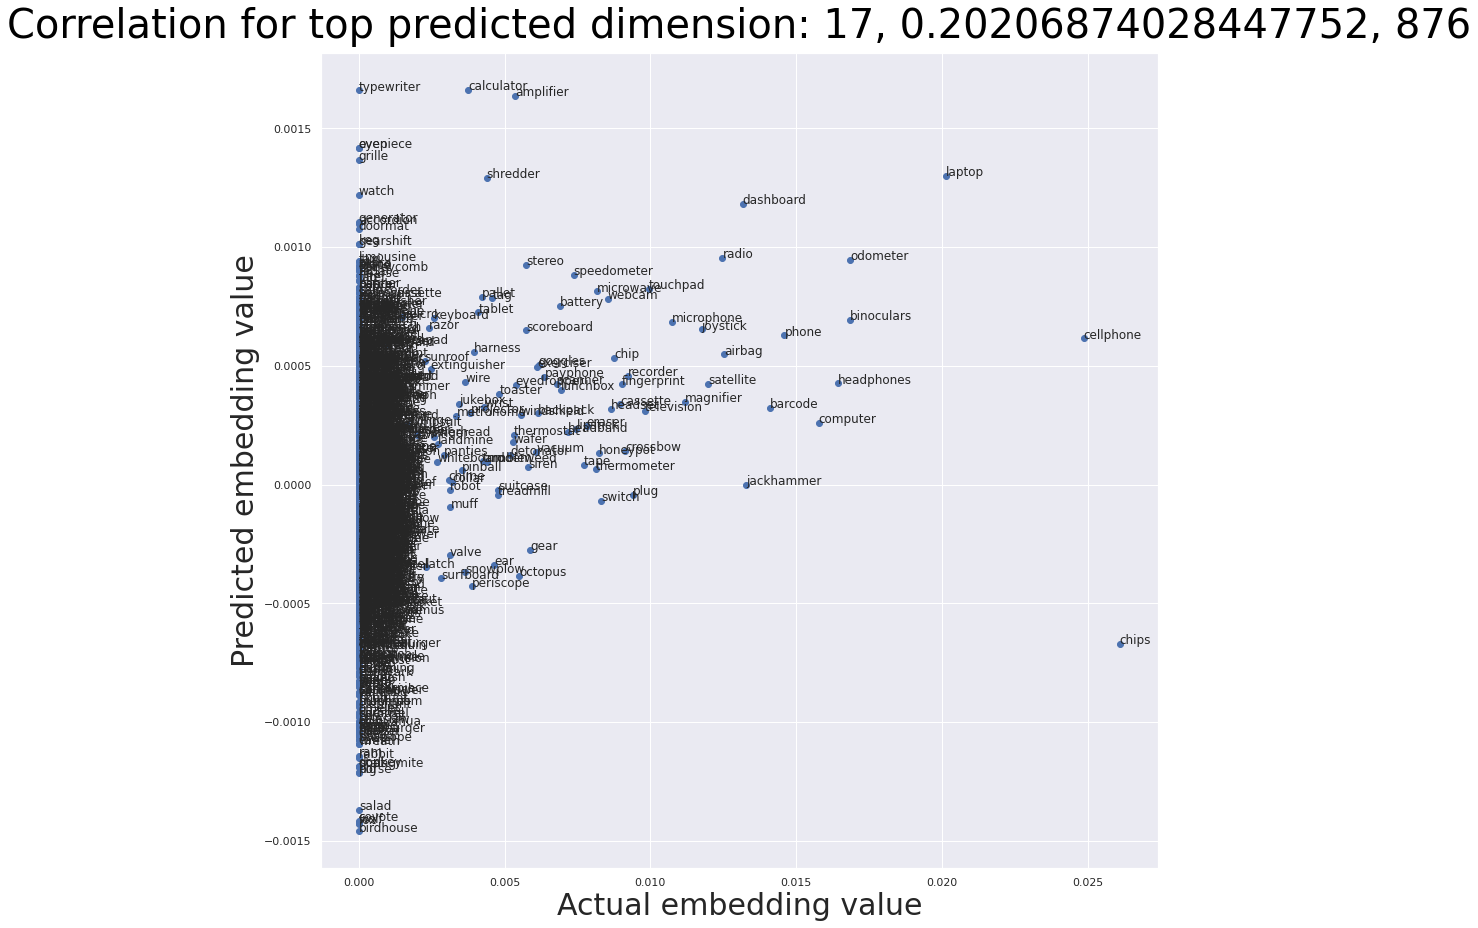

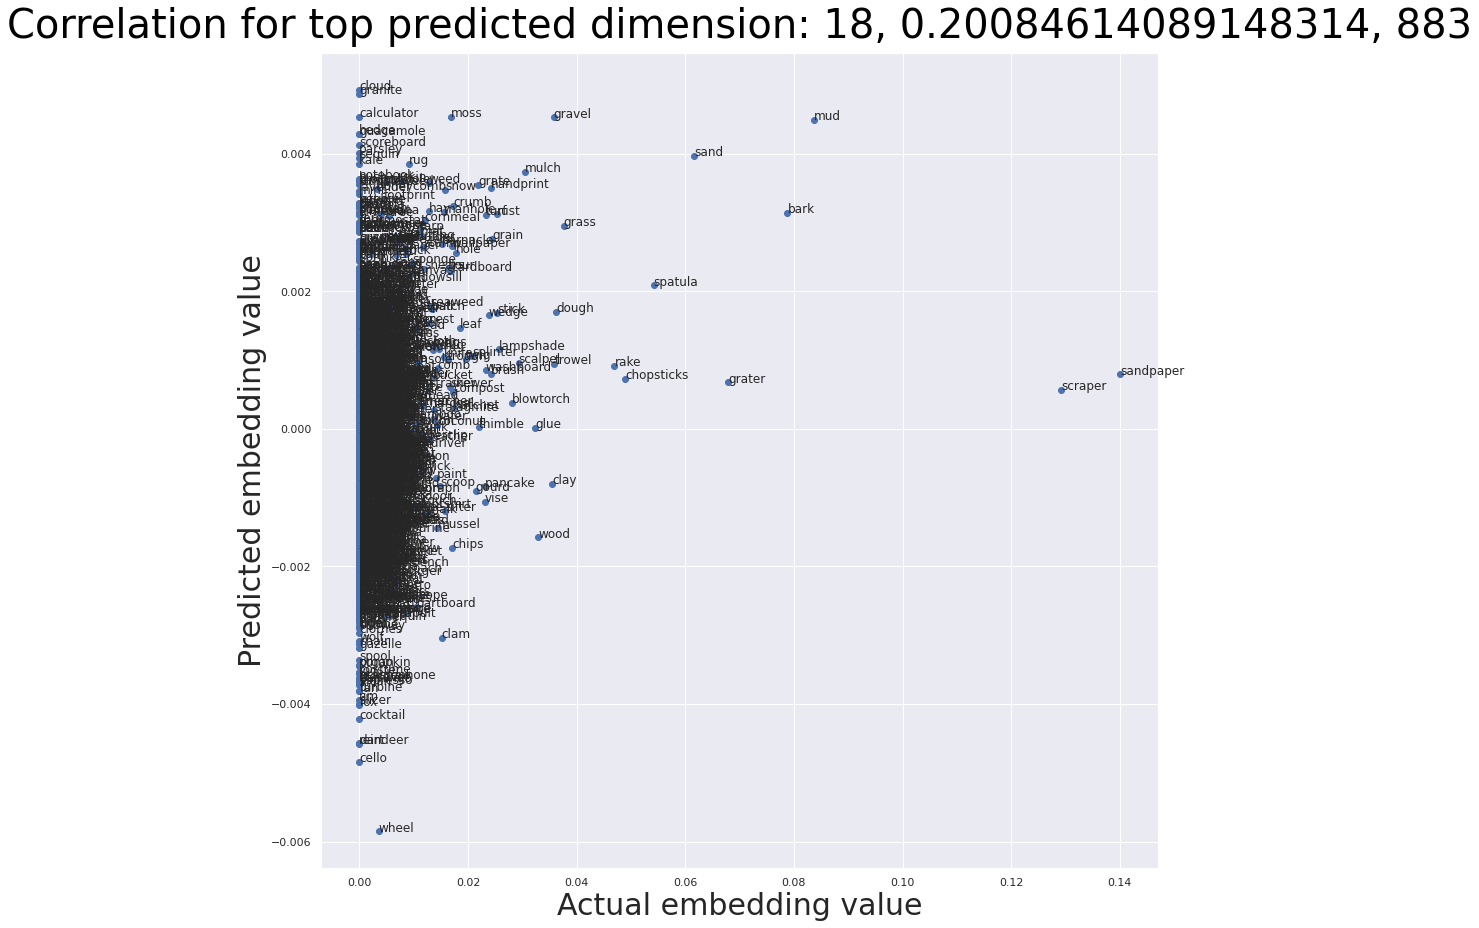

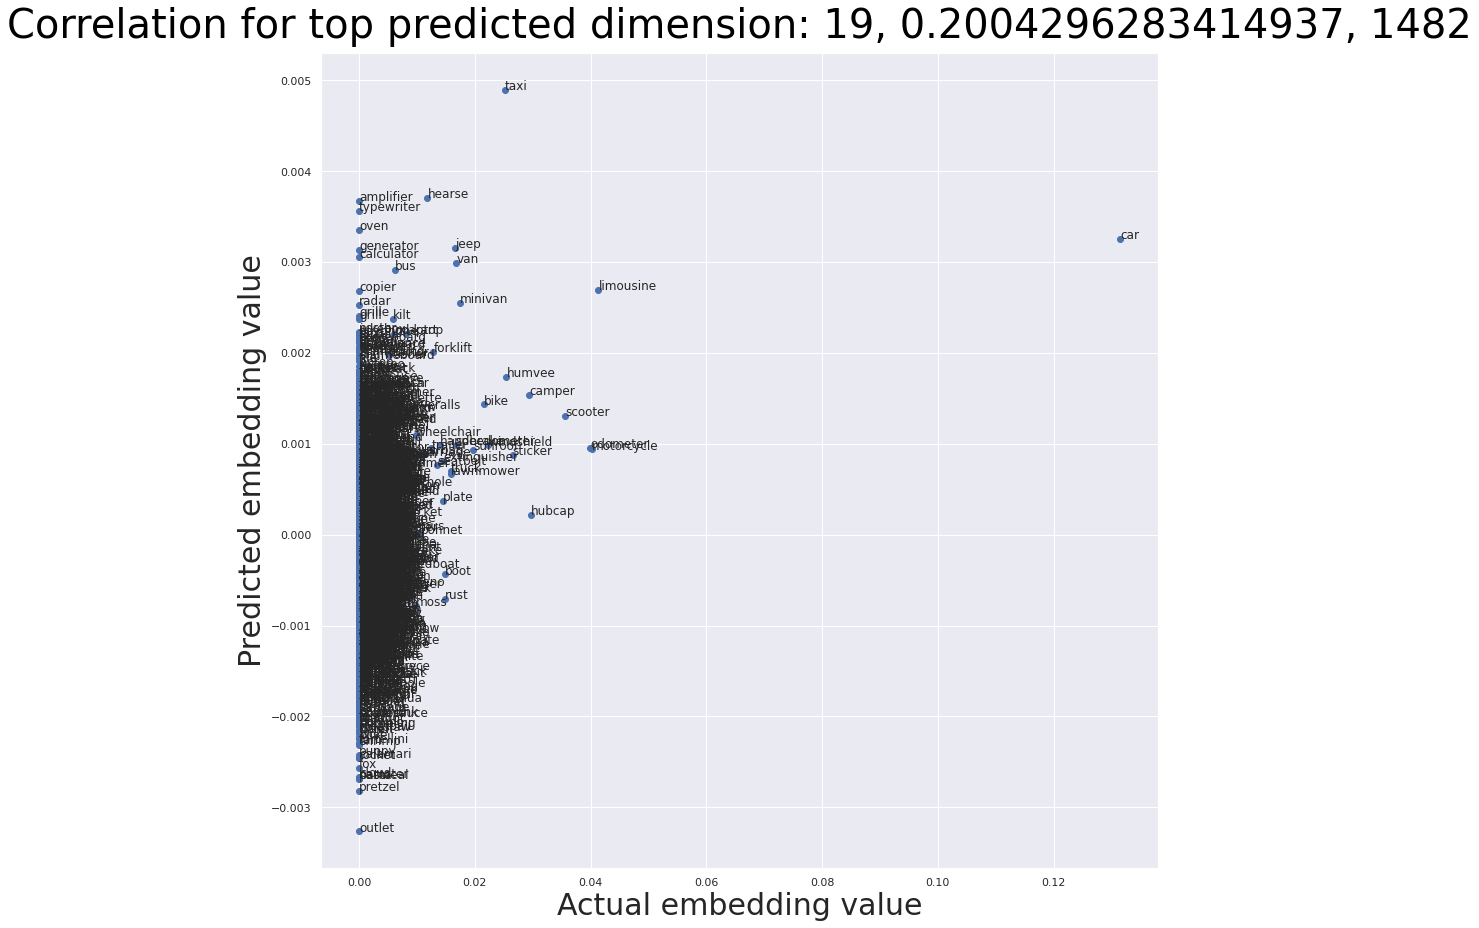

In [10]:
for topDim in range(20):
    x = []
    y = []
    for i, thing in enumerate(w2s_embeddings):
        x.append(w2s_embeddings[thing][maxdim[topDim]])
        y.append(predicted[i][maxdim[topDim]])

    plt.figure(figsize=(15,15))

    title_font = {'fontname':'Arial', 'size':'40', 'color':'black', 'weight':'normal',
      'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    axis_font = {'fontname':'Arial', 'size':'30'}
    sns.set()

    ax = plt.subplot() 
    plt.xlabel('Actual embedding value', **axis_font)
    plt.ylabel('Predicted embedding value', **axis_font)
    plt.title("Correlation for top predicted dimension: " + str(topDim) + ', ' + str(feature_mean_r[maxdim][topDim]) + ', ' + str(maxdim[topDim]), **title_font)

    ax.scatter(x, y)

    for i, thing in enumerate(w2s_embeddings):
        #ax.annotate(thing, (x[i], y[i]))
        plt.plot(x[i], y[i])
        plt.text(x[i], y[i], thing)